# Table of contents
0. [Calculate Ms](#calcuate_saturated_M)
1. [Spinw mean_field MH](#sw_MH)
2. [MMA single tetraheddron](#MMA_single_tetrahedra)
3. [Mont Carlo calculation for Nd2Zr2O7: Cp, MH and neutron](#MC_cp_mh)
4. [Plot MH_14T data with MC MH](#data_MC_mh)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib ipympl
import matplotlib as mpl
mpl.style.use('classic')
#import seaborn as sns # it will set to SNS style
#sns.reset_orig() # set back to the Matplotlib style
#mpl.style.use('seaborn')

def ndformfact1(q):# use numpy not sp
    s,j,l,ss = q/(4*np.pi), 9/2., 6., 3/2. ### Take care of the fraction 9/2=4
    fc = (j*(j+1)-ss*(ss+1)+l*(l+1))/(3*j*(j+1)+ss*(ss+1)-l*(l+1))
    
    j0 = [0.0540,25.0293,0.3101,12.1020,0.6575,4.7223,-0.0216]
    j2 = [0.6751,18.3421,1.6272,7.2600,0.9644,2.6016,0.0150]
    
    fm = (j0[0]*np.exp(-j0[1]*s**2) + j0[2]*np.exp(-j0[3]*s**2)+j0[4]*np.exp(-j0[5]*s**2) + j0[6] 
          + s**2*(j2[0]*np.exp(-j2[1]*s**2)+j2[2]*np.exp(-j2[3]*s**2)+j2[4]*np.exp(-j2[5]*s**2)+j2[6])*fc)
    return fm**2

def ff_HHL_plane(H, L, latt): # H and L index, lattice parameter in \AA
    H_unit = 2*np.pi/(latt/np.sqrt(2.))
    L_unit = 2*np.pi/latt
    q = np.sqrt((H*H_unit)**2 + (L*L_unit)**2)   
    return ndformfact1(q)

# test ff_HHL_plane
qdata = np.arange(0.0,12.,0.1)
ndform = ff_HHL_plane(0, L=qdata, latt=2*np.pi)
fig = plt.figure(figsize=(5,4))
plt.plot(qdata,ndform,label=r'Nd$^{3+}$',c='g')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [4]:
import matplotlib as mpl
from math import sqrt
def latexify(fig_width=None, fig_height=None, columns=1):

    """Set up matplotlib's RC params for LaTeX plotting.
    Call this before plotting a figure.

    Parameters
    ----------
    fig_width : float, optional, inches
    fig_height : float,  optional, inches
    columns : {1, 2}
    """
    # code adapted from http://www.scipy.org/Cookbook/Matplotlib/LaTeX_Examples
    #                   http://scipy-cookbook.readthedocs.io/items/Matplotlib_LaTeX_Examples.html

    # Width and max height in inches for IEEE journals taken from
    # computer.org/cms/Computer.org/Journal%20templates/transactions_art_guide.pdf

    assert(columns in [1,2])
    
    fig_width_pt = 246.0  # Get this from LaTeX using \showthe\columnwidth
    inches_per_pt = 1.0/72.27               # Convert pt to inches
    golden_mean = (sqrt(5)-1.0)/2.0         # Aesthetic ratio
    fig_width0 = fig_width_pt*inches_per_pt  # width in inches
    fig_height0 =fig_width0*golden_mean       # height in inches
    fig_size0 = [fig_width0,fig_height0]
    
    if fig_width is None:
        #fig_width = 3.39 if columns==1 else 6.9 # width in inches
        fig_width = fig_width0 if columns==1 else 6.9 # width in inches
        
    if fig_height is None:
        fig_height = fig_height0 # height in inches

    MAX_HEIGHT_INCHES = 8.0
    if fig_height > MAX_HEIGHT_INCHES:
        print("WARNING: fig_height too large:" + fig_height + 
              "so will reduce to" + MAX_HEIGHT_INCHES + "inches.")
        fig_height = MAX_HEIGHT_INCHES

    params = {'backend': 'pdf',
              #'text.latex.preamble': ['\usepackage{gensymb}'],
              'font.family': 'Arial',
              'axes.titlesize': 9, # 10,
              'axes.labelsize': 9, # 10, # fontsize for x and y labels (was 10)
              'font.size': 9, # 10, changed from 'text.fontsize'
              'legend.fontsize':9, # 10, 
              'xtick.labelsize': 9,
              'ytick.labelsize': 9,
              'xtick.direction': 'in',
              'ytick.direction': 'in',
              'text.usetex': False, # error if set to True
              'figure.figsize': [fig_width,fig_height],
              
              'mathtext.fontset':'custom',
              'mathtext.rm':'Arial',
              'mathtext.it':'Arial:italic',
              'mathtext.bf':'Arial:bold'
    }
    mpl.rcParams.update(params)
    return
latexify()

In [6]:
#mpl.rcParams.keys()

# Calcualte saturated magnetisation<a id='calcuate_saturated_M'></a>

In [9]:
g=5.15
M_cal = np.array([1./3**0.5*g/2, 1/4.*g, (1/6.)**0.5*g/2])
M_exp = np.array([1.468,1.292,1.13]) # PPMS 14T: M_[110] is easy to overs-measure due to misaliment
print(M_cal/M_exp)
#print(1.468/1.292)

g=0.05
M_cal = np.array([1./3**0.5*g/2, 1/4.*g, (1/6.)**0.5*g/2])
M_exp = np.array([1.39,1.21,1.02]) # PPMS 14T: subtrated Chi_VV
print(M_cal)
print(M_cal/M_exp)

"""
In high H, M_[100] and M_[111] are tend to be underestimated. M_[110] overstimated.
M_expr=M_[110]cos(\theta) + \chi_{[110]lowH} * H sin(\theta)^2
      \approx M_[110](1-\theta^2) + \chi_{[110]lowH} * H \theta^2
Fit high H part of MH, slop: \chi_{[110]lowH} \theta^2
                       intercept: M(1-\theta^2)
"""
print('Estimate msialignment for [110]\n',np.sqrt((8e-7-6e-7)/9.1e-5)*180/np.pi, 'degree') # (slop-chi_vv_100)/chi_110_lowH
print('Estimated M_[110]\n'), 1.022/(1-(8e-7-5.3e-7)/9e-5)

# Ratios M100/M111 and M110/M111
print('theoritical ratio\n', 2/np.sqrt(3),np.sqrt(2/3.)) # Theory

print(1.468/1.292, 1.13/1.292) # PPMS 14T raw
print(1.39/1.21,1.025/1.21) # PPMS 14T substract chi_vv

print(1.28/1.16, 1.03/1.16) # Lhotel's
print(1.24/1.13, 0.99/1.13) # Lhotel's subtracted chi_vv

[1.01272271 0.99651703 0.93030031]
[0.01443376 0.0125     0.01020621]
[0.010384   0.01033058 0.01000609]
Estimate msialignment for [110]
 2.68606757379907 degree
Estimated M_[110]

theoritical ratio
 1.1547005383792517 0.816496580927726
1.1362229102167183 0.8746130030959751
1.1487603305785123 0.8471074380165289
1.1034482758620692 0.8879310344827587
1.097345132743363 0.8761061946902655


In [ ]:
print 15/575.32*6
print 3.5/336.491*3

# Spinw mean-field MH <a id='sw_MH'></a>

In [10]:
# Ｐｌｏｔ　ｏｒｄｅｒｉｎｇ　ｐａｒａｍｅｔｅｒ　ＶＳ　Ｔ
#load
path=r'D:\3_Physical Properties\Nd2Zr2O7\mk_MH_MT_in_Dresdern\SpinW_calculation_MH/'

data = np.genfromtxt(os.path.join(path,'nzo_cal_SzT.txt'), dtype=None, skip_header=0,delimiter=None)

fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))
axs.plot(data[:,0],data[:,1],'o',mec='red',mfc='white')
axs.set_ylim(-0.01,0.6)

plt.xlabel('T (K)',size=14)
axs.set_ylabel(r'$<\sigma_{\tilde{z}}>$',fontsize=18)

plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
#fig.savefig(os.path.join(path,'nzo_cal_SzT.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [93]:
#　Ｐｌｏｔ　ｔｈｅ　Ｈ－Ｔ　ｐｈａｓｅ　ｄｉａｇｒａｍ
#load
path=r'D:\3_Physical Properties\Nd2Zr2O7\mk_MH_MT_in_Dresdern\SpinW_calculation_MH/'

Ms = np.genfromtxt(os.path.join(path,'nzo_cal_M(BT)[100]_diagram_500runs.txt'), skip_header=1)
Ms = np.genfromtxt(os.path.join(path,'nzo_cal_M(BT)[110]_diagram_500runs.txt'), skip_header=1)
Ms = np.genfromtxt(os.path.join(path,'nzo_cal_M(BT)[111]_diagram_500runs.txt'), skip_header=1)
Ms = np.genfromtxt(os.path.join(path,'ybtio_cal_M(BT)[111]_diagram_200runs_Ross.txt'), skip_header=0)
#Ms = np.genfromtxt(os.path.join(path,'ybtio_cal_M(BT)[111]_diagram_200runs_Robert.txt'), skip_header=0)
#Ms = np.genfromtxt(os.path.join(path,'ybtio_cal_M(BT)[111]_diagram_200runs_Thompson.txt'), skip_header=0)
#print data
# the field and temperture points for NdZrO
Bs = np.arange(0,1.02,0.02)
Ts = np.arange(0,1.02,0.02)

# YbTiO: the field and temperture points
Bs = np.linspace(0,0.8,num=51,endpoint=True)
Ts = np.linspace(0,5, num=51, endpoint=True)# 
X, Y = np.meshgrid(Ts, Bs)
bordery = Bs[np.argsort(np.diff(Ms,n=1,axis=0), axis=0)[-1:]]
borderx = np.tile(Ts,(1,1))

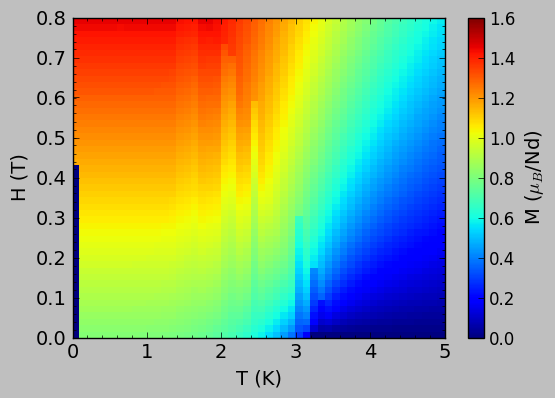

In [94]:
vmaxs = [1.4, 1.1, 1.2]

fig = plt.figure(figsize=[6,4])

#plt.contour(y, x, intensity, 6, colors='k',linewidths=0.1)  # negative contours will be dashed by default

# pcolormesh actually draws individual rectangles which contains white lines
#pcol = plt.pcolormesh(Bs, Ts, Ms.T,cmap='jet',vmin=0.8,vmax=1.6,linewidth=0,rasterized=True)# '_r' is reversed colormap, cmap='RdBu_r'

pcol = plt.pcolormesh(Ts, Bs, Ms,cmap='jet',vmin=0,vmax=1.6,linewidth=0,rasterized=True)
#line = plt.scatter(borderx,bordery,c='black')
#conp = plt.contour(Ts, Bs, np.vstack([np.diff(Ms,n=1,axis=0),np.zeros(51)]),10, colors='k',interpolation='none')
#pcol = plt.pcolormesh(X, Y, np.diff(Ms,n=1,axis=0))

pcol.set_edgecolor('face') # remove the white lines in the plot

plt.xlabel('T (K)',size=14)
plt.ylabel('H (T)',size=14)

plt.minorticks_on()
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)

# set colorbar and its properties
cb = plt.colorbar(pcol) # label='Intensity', ticks=range(0,100)
cb.ax.set_ylabel('M ($\mu_B$/Nd)',fontsize=14)
cb.ax.tick_params(labelsize=12)
#fig.savefig(os.path.join(path,'nzo_cal_M(BT)[100]_diagram_500runs.pdf'), bbox_inches="tight",verbose=True)  
#fig.savefig(os.path.join(path,'nzo_cal_M(BT)[110]_diagram_500runs.pdf'), bbox_inches="tight",verbose=True)  
#fig.savefig(os.path.join(path,'nzo_cal_M(BT)[111]_diagram_500runs.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

In [98]:
np.exp(-3*11.606/1.)
1./11.606

g = np.array([[3.4133,   -0.6767,   -0.6767],
              [-0.6767,    3.4133,   -0.6767],
              [-0.6767,   -0.6767,   3.4133]])

s = np.array([0.137268825194025,-0.273245917225244,0.395593147500797])
g.dot(s)
a = np.array([0.269126178445663,-0.378345858394887,-0.185541131587229])
b = np.array([-2.01576550353235,0.260482693381693,-0.123766418061672])
np.cross(a,b)

theatap = 0.25
jxx, jyy, jzz, angle = 0.106,  0.,    -0.047, 47
jxx, jyy, jzz, angle = 0.0844, 0.016, -0.043, 60


array([ 0.09515677,  0.4073162 , -0.69255382])

In [195]:
# Ｐｌｏｔ　ｔｈｅ　ＭＨ　ａｎｄ　ｄＭ／ｄＨ　ａｔ　０．１，０．５，０．９Ｋ　ｆｏｒ　ｔｈｅ　ｔｈｒｅｅ　ｄｉｒｅｃｔｉｏｎｓ: six pannels

# load data
path=r'D:\3_Physical Properties\Nd2Zr2O7\mk_MH_MT_in_Dresdern\SpinW_calculation_MH/'
fnames = ['nzo_cal_mh_0.100K.txt', 'nzo_cal_mh_0.500K.txt','nzo_cal_mh_0.900K.txt']

Mt1 = np.genfromtxt(os.path.join(path,fnames[0]), dtype=None, skip_header=1)
Mt2 = np.genfromtxt(os.path.join(path,fnames[1]), dtype=None, skip_header=1)
Mt3 = np.genfromtxt(os.path.join(path,fnames[2]), dtype=None, skip_header=1)

# calculate dM/dH and new H, one point is removed
newH = Mt1[:-1,0]+0.005 # the new H for dM/dH

dMdH = (np.diff(Mt1[:,1:7],axis=0).T / np.diff(Mt1[:,0]).T).T #print newH.shape, dMdH.shape
dMt1 = np.column_stack( (newH,dMdH) )

dMdH = (np.diff(Mt2[:,1:7],axis=0).T / np.diff(Mt2[:,0]).T).T
dMt2 = np.column_stack( (newH,dMdH) )

dMdH = (np.diff(Mt3[:,1:7],axis=0).T / np.diff(Mt3[:,0]).T).T
dMt3 = np.column_stack( (newH,dMdH) )


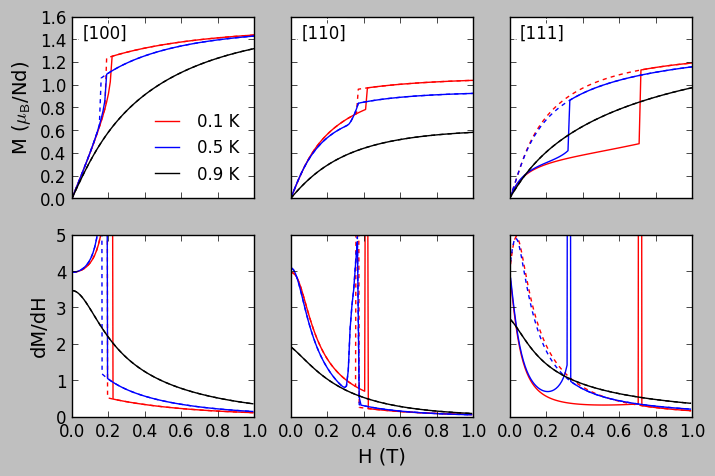

In [196]:
# Plot only the MH and dM/dH
from cycler import cycler
plt.rc('axes', prop_cycle=(cycler('color', ['red','red', 'blue','blue', 'black','black'])+
                           cycler('linestyle', ['-', '--', '-', '--','-', '--'])+
                           cycler('dashes', [(5,0.01),(3, 3),(5,0.01),(3, 3),(5,0.01),(3, 3)])))

fig, axs = plt.subplots(nrows=2, ncols=3, sharex='col', sharey='row',figsize=(8,5))
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

# Plot MH
# [100] direction
axs[0,0].plot(Mt1[:,0],Mt1[:,1],Mt1[:,0],Mt1[:,2],# 0.1K
              Mt2[:,0],Mt2[:,1],Mt2[:,0],Mt2[:,2],# 0.5K
              Mt3[:,0],Mt3[:,1],Mt3[:,0],Mt3[:,2])# 0.9K
axs[0,0].text(0.18,1.45,'[100]',size=12, ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

# [110] direction
axs[0,1].plot(Mt1[:,0],Mt1[:,3],Mt1[:,0],Mt1[:,4],# 0.1K
              Mt2[:,0],Mt2[:,3],Mt2[:,0],Mt2[:,4],# 0.5K
              Mt3[:,0],Mt3[:,3],Mt3[:,0],Mt3[:,4])# 0.9K
axs[0,1].text(0.18,1.45,'[110]',size=12, ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

# [111] direction
axs[0,2].plot(Mt1[:,0],Mt1[:,5],Mt1[:,0],Mt1[:,6],# 0.1K
              Mt2[:,0],Mt2[:,5],Mt2[:,0],Mt2[:,6],# 0.5K
              Mt3[:,0],Mt3[:,5],Mt3[:,0],Mt3[:,6])# 0.9K
axs[0,2].text(0.18,1.45,'[111]',size=12, ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

# Plot dM/dH
# [100] direction
axs[1,0].plot(dMt1[:,0],dMt1[:,1],dMt1[:,0],dMt1[:,2],# 0.1K
              dMt2[:,0],dMt2[:,1],dMt2[:,0],dMt2[:,2],# 0.5K
              dMt3[:,0],dMt3[:,1],dMt3[:,0],dMt3[:,2])# 0.9K
# [110] direction
axs[1,1].plot(dMt1[:,0],dMt1[:,3],dMt1[:,0],dMt1[:,4],# 0.1K
              dMt2[:,0],dMt2[:,3],dMt2[:,0],dMt2[:,4],# 0.5K
              dMt3[:,0],dMt3[:,3],dMt3[:,0],dMt3[:,4])# 0.9K
# [111] direction
axs[1,2].plot(dMt1[:,0],dMt1[:,5],dMt1[:,0],dMt1[:,6],# 0.1K
              dMt2[:,0],dMt2[:,5],dMt2[:,0],dMt2[:,6],# 0.5K
              dMt3[:,0],dMt3[:,5],dMt3[:,0],dMt3[:,6])# 0.9K

axs[1,2].set_ylim(0, 5)

axs[1,1].set_xlabel('H (T)',size=14)
axs[0,0].set_ylabel('M ($\mathsf{\mu_B}$/Nd)',size=14)
axs[1,0].set_ylabel('dM/dH',size=14)

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

rline = mlines.Line2D([], [], color='red', linestyle='-',  label='0.1 K')
bline = mlines.Line2D([], [], color='blue', linestyle='-',  label='0.5 K')
bkline = mlines.Line2D([], [], color='black', linestyle='-', label='0.9 K')
axs[0,0].legend(handles=[rline, bline, bkline],loc='best',fontsize=12,frameon=False)

# red_patch = mpatches.Patch(color='red', label='0.1 K')
# blue_patch = mpatches.Patch(color='blue', label='0.5 K')
# black_patch = mpatches.Patch(color='black', label='0.9 K')
# solid_patch = mpatches.Patch(linestyle='-',color='red', label='Increasing B')
# dash_patch = mpatches.Patch(linestyle='--',color='red', label='Increasing B')
# axs[0,0].legend(handles=[red_patch, blue_patch, black_patch],loc='best',fontsize=10,frameon=False)
#fig.savefig(os.path.join(path,'nzo_cal_M(B)_500runs.pdf'), bbox_inches="tight",verbose=True)  
plt.show()        

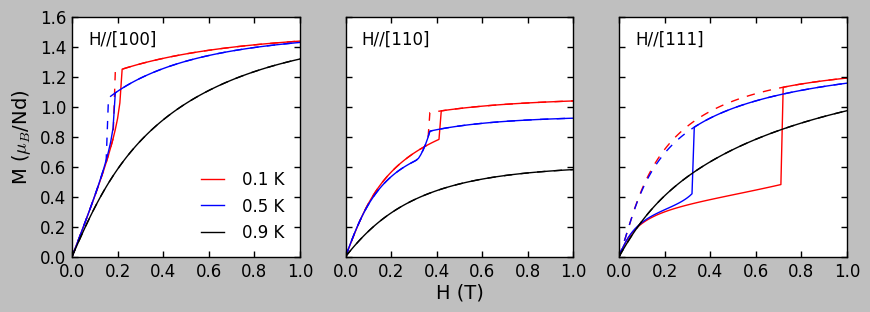

In [197]:
# Plot only the MH
fig, axs = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row',figsize=(10,3))

# Plot MH
# [100] direction
axs[0].set_color_cycle(['red','red', 'blue','blue', 'black','black', 'yellow'])
axs[0].plot(Mt1[:,0],Mt1[:,1],Mt1[:,0],Mt1[:,2],'--',# 0.1K
            Mt2[:,0],Mt2[:,1],Mt2[:,0],Mt2[:,2],'--',# 0.5K
            Mt3[:,0],Mt3[:,1],Mt3[:,0],Mt3[:,2],'--')# 0.9K
axs[0].tick_params(axis='both',which='both',width=1,length=4,labelsize=12)
axs[0].text(0.22,1.45,'H//[100]',size=12, ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
# [110] direction
axs[1].set_color_cycle(['red','red', 'blue','blue', 'black','black', 'yellow'])
axs[1].plot(Mt1[:,0],Mt1[:,3],Mt1[:,0],Mt1[:,4],'--',# 0.1K
            Mt2[:,0],Mt2[:,3],Mt2[:,0],Mt2[:,4],'--',# 0.5K
            Mt3[:,0],Mt3[:,3],Mt3[:,0],Mt3[:,4],'--')# 0.9K
axs[1].tick_params(axis='both',which='both',width=1,length=4,labelsize=12)
axs[1].text(0.22,1.45,'H//[110]',size=12, ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
# [111] direction
axs[2].set_color_cycle(['red','red', 'blue','blue', 'black','black', 'yellow'])
axs[2].plot(Mt1[:,0],Mt1[:,5],Mt1[:,0],Mt1[:,6],'--',# 0.1K
            Mt2[:,0],Mt2[:,5],Mt2[:,0],Mt2[:,6],'--',# 0.5K
            Mt3[:,0],Mt3[:,5],Mt3[:,0],Mt3[:,6],'--')# 0.9K
axs[2].tick_params(axis='both',which='both',width=1,length=4,labelsize=12)
axs[2].text(0.22,1.45,'H//[111]',size=12, ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))


axs[0].legend(handles=[rline, bline, bkline],loc='best',fontsize=12,frameon=False)#(using the aboved defined...)

axs[1].set_xlabel('H (T)',size=14,labelpad=2)
axs[0].set_ylabel('M ($\mu_B$/Nd)',size=14)
#fig.savefig(os.path.join(path,'nzo_cal_M(B)_500runs_0.pdf'), bbox_inches="tight",verbose=True)  
plt.show()   

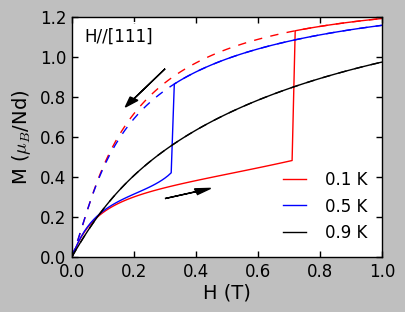

In [198]:
# Plot only the MH
fig, axs = plt.subplots(nrows=1, ncols=1, sharex='col', sharey='row',figsize=(4,3))

# Plot MH
# [111] direction
axs.set_color_cycle(['red','red', 'blue','blue', 'black','black', 'yellow'])
axs.plot(Mt1[:,0],Mt1[:,5],Mt1[:,0],Mt1[:,6],'--',# 0.1K
            Mt2[:,0],Mt2[:,5],Mt2[:,0],Mt2[:,6],'--',# 0.5K
            Mt3[:,0],Mt3[:,5],Mt3[:,0],Mt3[:,6],'--')# 0.9K

axs.arrow(0.3, 0.29, 0.1, 0.035, fc="k", ec="k",head_width=0.03, head_length=0.05)
axs.arrow(0.3, 0.94, -0.1, -0.15, fc="k", ec="k",head_width=0.03, head_length=0.05)

axs.tick_params(axis='both',which='both',width=1,length=4,labelsize=12)
axs.text(0.15,1.1,'H//[111]',size=12, ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))


axs.legend(handles=[rline, bline, bkline],loc='best',fontsize=12,frameon=False)#(using the aboved defined...)

axs.set_xlabel('H (T)',size=14,labelpad=2)
axs.set_ylabel('M ($\mu_B$/Nd)',size=14)
#fig.savefig(os.path.join(path,'nzo_cal_M(B)_500runs_[111].pdf'), bbox_inches="tight",verbose=True)  
plt.show()   

In [95]:
gz=1*65.34/161.45
gh=1*96.06/161.45/(96.06/98.08)
print gz, gh
zn = 26000
hso = 0
zso = 6400
pz=zn*gz

print pz
1/(161./(161+90))*6400
16**4*5000

0.404707339734 0.607494580365
10522.3908331


327680000

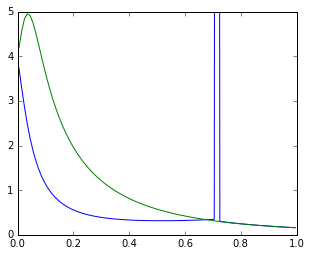

In [102]:
# Plot dM/dH
# [111] direction
fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))
axs.plot(dMt1[:,0],dMt1[:,5],dMt1[:,0],dMt1[:,6])# 0.1K
axs.set_ylim(0,5)
plt.show()

In [9]:
# Ｔｈｅ　２ｎｄ　ｄｏｍａｉｎ：　Ｐｌｏｔ　ｔｈｅ　ＭＨ　ａｎｄ　ｄＭ／ｄＨ　ａｔ　０．１，０．５，０．９Ｋ　ｆｏｒ　ｔｈｅ　ｔｈｒｅｅ　ｄｉｒｅｃｔｉｏｎｓ: six pannels

# load data
path=r'D:\3_Physical Properties\Nd2Zr2O7\mk_MH_MT_in_Dresdern\SpinW_calculation_MH/'
fnames = ['nzo_cal_mh__0.10K_2nd_domain.txt', 'nzo_cal_mh__0.10K_2nd_domain.txt','nzo_cal_mh__0.10K_2nd_domain.txt']

Mt1 = np.genfromtxt(os.path.join(path,fnames[0]), dtype=None, skip_header=1)
Mt2 = np.genfromtxt(os.path.join(path,fnames[1]), dtype=None, skip_header=1)
Mt3 = np.genfromtxt(os.path.join(path,fnames[2]), dtype=None, skip_header=1)

# calculate dM/dH and new H, one point is removed
newH = Mt1[:-1,0]+0.005 # the new H for dM/dH

dMdH = (np.diff(Mt1[:,1:7],axis=0).T / np.diff(Mt1[:,0]).T).T #print newH.shape, dMdH.shape
dMt1 = np.column_stack( (newH,dMdH) )

dMdH = (np.diff(Mt2[:,1:7],axis=0).T / np.diff(Mt2[:,0]).T).T
dMt2 = np.column_stack( (newH,dMdH) )

dMdH = (np.diff(Mt3[:,1:7],axis=0).T / np.diff(Mt3[:,0]).T).T
dMt3 = np.column_stack( (newH,dMdH) )


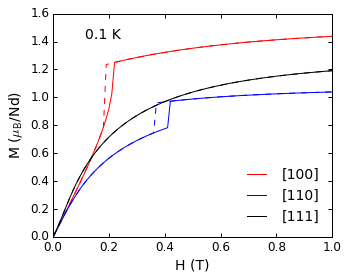

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))
# [111] direction
axs.set_color_cycle(['red','red', 'blue','blue', 'black','black', 'yellow'])
axs.plot(
    Mt1[:,0],Mt1[:,1],Mt1[:,0],Mt1[:,2],'--',#[100] 0.1K
    Mt1[:,0],Mt1[:,3],Mt1[:,0],Mt1[:,4],'--',#[110] 0.1K
    Mt1[:,0],Mt1[:,5],Mt1[:,0],Mt1[:,6],'--',#[111] 0.1K
        )

axs.text(0.18,1.45,'0.1 K',size=14, ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
axs.set_ylim(0,1.6)

axs.tick_params(axis='both',which='both',width=1,length=4,labelsize=12)

axs.set_xlabel('H (T)',size=14)
axs.set_ylabel('M ($\mathsf{\mu_B}$/Nd)',size=14)

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

rline = mlines.Line2D([], [], color='red', linestyle='-',  label='[100]')
bline = mlines.Line2D([], [], color='blue', linestyle='-',  label='[110]')
bkline = mlines.Line2D([], [], color='black', linestyle='-', label='[111]')
axs.legend(handles=[rline, bline, bkline],loc='best',fontsize=14,frameon=False)
fig.savefig(os.path.join(path,'nzo_cal_MH_2nd_domain.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

# MMA single tetrahedron <a id='MMA_single_tetrahedra'></a>

[[0.2505 0.2524 0.2542 ... 0.2756 0.2764 0.2771]
 [0.2575 0.2594 0.2613 ... 0.2831 0.2838 0.2845]
 [0.2639 0.2658 0.2678 ... 0.2899 0.2906 0.2913]
 ...
 [0.2919 0.2938 0.2957 ... 0.3106 0.3105 0.3104]
 [0.2893 0.2912 0.293  ... 0.3067 0.3066 0.3063]
 [0.2863 0.2882 0.2899 ... 0.3024 0.3021 0.3017]]


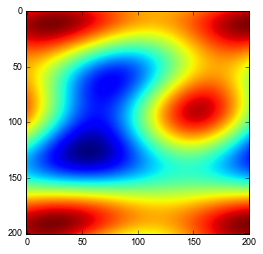

In [32]:
# Ｐｌｏｔ ＭＭＡ　ｒｅｓｕｌｔ： ｓｉｎｇｌｅ　ｔｅｔｒａｈｅｄｒａ
# ＭＨ　ａｔ　０．０　Ｋ　ｆｏｒ　［１１１］　ｆｉｅｌｄ

# load data
path=r'D:\3_Physical Properties\Nd2Zr2O7\mk_MH_MT_in_Dresdern\SpinW_calculation_MH/'
fnames = ['nzo_MH_Owens_15deg_0K_MMA.txt', 'nzo_MH_Owens_30deg_0K_MMA.txt',
          'nzo_MH_Owens_47deg_0K_MMA.txt', 'nzo_MH_Owens_60deg_0K_MMA.txt',
          'energy_theta_phi_MMA.txt', 'momentsH_singleTetra_MMA.txt'
         ]

Mt0 = np.genfromtxt(os.path.join(path,fnames[0]), dtype=None, skip_header=0)
Mt1 = np.genfromtxt(os.path.join(path,fnames[1]), dtype=None, skip_header=0)
Mt2 = np.genfromtxt(os.path.join(path,fnames[2]), dtype=None, skip_header=0)
Mt3 = np.genfromtxt(os.path.join(path,fnames[3]), dtype=None, skip_header=0)

Ethph = np.genfromtxt(os.path.join(path,fnames[4]), dtype=None, skip_header=3)
Hmses = np.genfromtxt(os.path.join(path,fnames[5]), dtype=None, skip_header=1)

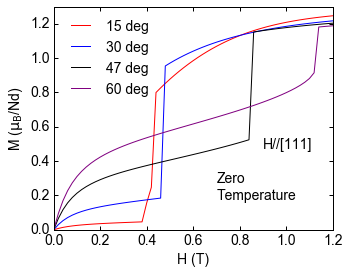

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))
# [111] direction
axs.set_prop_cycle('c', ['red', 'blue', 'black','purple'])
axs.plot(
    Mt0[:,0],Mt0[:,1]*2.6,'-',#15deg 0.K
    Mt1[:,0],Mt1[:,1]*2.6,'-',#30deg 0.K
    Mt2[:,0],Mt2[:,1]*2.6,'-',#47deg 0.K
    Mt3[:,0],Mt3[:,1]*2.6,'-',#60deg 0.K
        )

axs.text(0.7,0.25,'Zero\nTemperature',size=14, ha='left', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
axs.text(0.9,0.5,'H//[111]',size=14, ha='left', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
axs.set_ylim(0,1.3)

axs.tick_params(axis='both',which='both',width=1,length=4,labelsize=14)

axs.set_xlabel('H (T)',size=14)
axs.set_ylabel('M ($\mathsf{\mu_B}$/Nd)',size=14)

import matplotlib.patches as mpatches
import matplotlib.lines as mlines

rline = mlines.Line2D([], [], color='red', linestyle='-',  label='15 deg')
bline = mlines.Line2D([], [], color='blue', linestyle='-',  label='30 deg')
bkline = mlines.Line2D([], [], color='black', linestyle='-', label='47 deg')
ppline = mlines.Line2D([], [], color='purple', linestyle='-', label='60 deg')
axs.legend(handles=[rline, bline, bkline,ppline],loc='best',fontsize=14,frameon=False)
#fig.savefig(os.path.join(path,'nzo_MH_Owens_15-60deg_0K_MMA.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

In [70]:
locs = np.array( [(x[i], y[np.argmin(Ethph[i])],Ethph[i,np.argmin(Ethph[i])]) for i in range(0,200)] ).T
#print(locs.T)
plt.figure()
plt.plot(locs[2])
plt.show()
from scipy.signal import find_peaks
peaks, _ = find_peaks(-locs[2], height=0)
print(peaks[0])

FigureCanvasNbAgg()

66


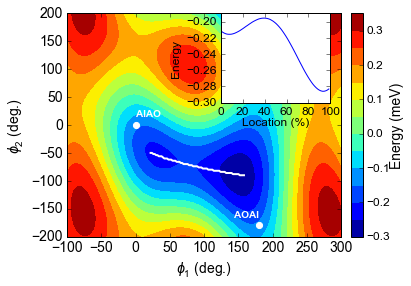

In [129]:
# Plot the energy landscape for spins on the triangular lattice and the kagome lattice
%matplotlib inline
from matplotlib.font_manager import FontProperties
import matplotlib.colors as colors
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):# sample the original colormap at n points between min and max
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({cmap},{a:.2f},{b:.2f})'.format(cmap=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap('jet')#'RdBu_r'
new_cmap = truncate_colormap(cmap, 0.0, 1)

num = 201
x = np.linspace(-100, 300, num,endpoint=True)
y = np.linspace(-200, 200, num,endpoint=True)
X, Y = np.meshgrid(x,y,indexing='xy')
Z = Ethph#/4.*100

fig = plt.figure()
#cs = plt.contour(X, Y, Z.T, 15, colors='k',linewidths=0.5,linestyles ='dashed')  # negative contours will be dashed by default
cs = plt.contourf(X,Y,Z.T,15,cmap=new_cmap,origin='lower',extend='neither')  # negative contours will be dashed by default
#plt.clabel(cs,inline=False,fmt='%1.3f',fontsize=10,colors='k')
#pcol = plt.pcolormesh(x,y, Z.T, cmap='jet',linewidth=0,rasterized=True)# '_r' is reversed colormap
#pcol.set_edgecolor('face') # remove the white lines in the plot

# set colorbar and its properties
cb = plt.colorbar(pad=0.03)
cb.ax.set_ylabel('Energy (meV)', fontsize=14, labelpad=0)
cb.ax.tick_params(labelsize=12)

font = FontProperties().copy()
font.set_weight('bold')
plt.scatter([0],[0],color='w',marker='.',s=150,zorder=10)
plt.text(0,20,'AIAO',size=14, ha='left', va='center', color='white',fontproperties=font,zorder=3)
plt.scatter([180],[-180],color='w',marker='.',s=150,zorder=10)
plt.text(180,-160,'AOAI',size=14, ha='right', va='center', color='white',fontproperties=font,zorder=3)

plt.xlabel(r'$\phi_1$ (deg.)',size=14)
plt.ylabel(r'$\phi_2$ (deg.)',size=14)

#plt.minorticks_on()
plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)

# Cut connetiong the two local minima
start, end = peaks[0]-5, peaks[1]+5
plt.plot(locs[0,start:end], locs[1,start:end],c='w',lw=2)
axins = plt.gca().inset_axes([0.56, 0.6, 0.4, 0.4],)
#axins.set_facecolor('#E6E6E6')
#plt.setp(axins.get_xticklabels(), backgroundcolor='#E6E6E6')
axins.plot(range(0,-start+end)/(-start+end)*100,locs[2,start:end])
#axins.set_xlim([0,69])
axins.set_ylim([-0.3,-0.19])
axins.set_xlabel(r'Location (%)',size=12,labelpad=0,color='black')
axins.set_ylabel(r'Energy',size=12)

axins.tick_params(labelsize=12)

fig.savefig(os.path.join(path,fnames[4]).replace('.txt','.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

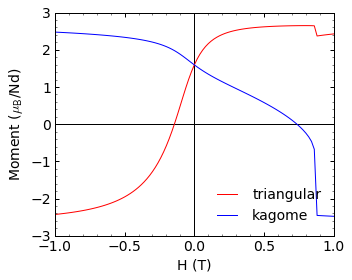

In [29]:
dat = Hmses
fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))
# [111] direction
axs.set_color_cycle(['red', 'blue', 'black','purple'])
axs.axvline(linewidth=1, color='k')
axs.axhline(linewidth=1, color='k')
axs.plot(dat[:,0],dat[:,2],'-',label='triangular')
axs.plot(dat[:,0],dat[:,1],'-',label='kagome')

axs.tick_params(axis='both',which='major',width=1,length=4,labelsize=14)
plt.minorticks_on()
plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)

axs.set_xlabel('H (T)',size=14)
axs.set_ylabel('Moment ($\mathsf{\mu_B}$/Nd)',size=14)

plt.legend(loc='best',frameon=False,fontsize=14)
fig.savefig(os.path.join(path,fnames[5]).replace('.txt','.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

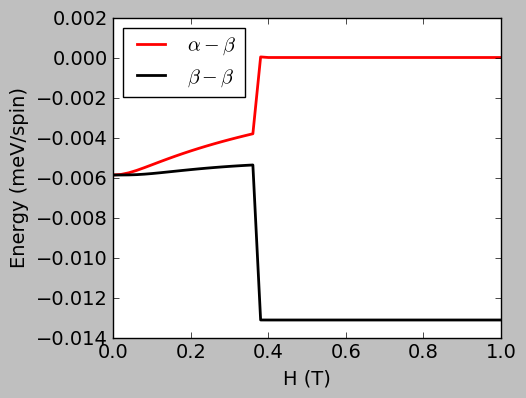

In [4]:
# Bond energy in field (calculated by SpinW)
#Load the file: every row for a energy (43 row [0,0.42]meV),every col (101*101) is a Q on Grid(X[3,3],Y[3,3])
fpath=r'D:\5_Neutron Scattering\6_E2_April_2015\field_along110/'
fname = r'Bond_energy_inField_NdZrO.txt'

data = np.genfromtxt(os.path.join(fpath,fname))

fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))
axs.plot(data[:,0],data[:,1]/4,'-',lw=2,color='red',label=r'$\alpha-\beta$')# average to per spin
axs.plot(data[:,0],data[:,3]/2,'-',lw=2,color='black',label=r'$\beta-\beta$')

plt.xlabel('H (T)',size=14)
axs.set_ylabel(r'Energy (meV/spin)',fontsize=14)
plt.xticks( color='k', size=14)
plt.yticks( color='k', size=14)
plt.legend(loc='best')

#fig.savefig(os.path.join(fpath,fname).replace('txt','pdf'), bbox_inches="tight",verbose=True)  
plt.show()

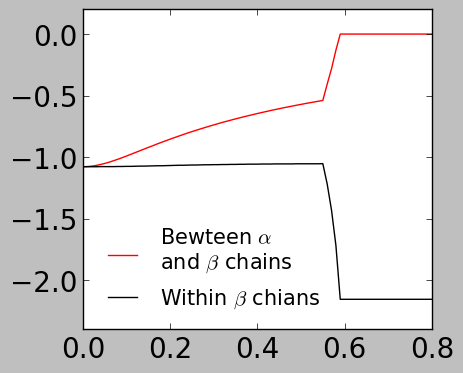

In [162]:
# 2D spins: Magnetisation and Bond energy in field (calculated by MMA)
fpath=r'D:\5_Neutron Scattering\6_E2_April_2015\field_along110/'
fname = r'bond_energy_H[110]_MMA.txt' # by MMA 2D spins
data = np.genfromtxt(os.path.join(fpath,fname),skip_header=2,usecols=[0,5,6,7,8,9])

fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(4.5,4))
axs.plot(data[:,0],data[:,3]*100/2,'-',lw=1,color='red',label='Bewteen '+r'$\alpha$'+'\nand '+r'$\beta$'+' chains')# average to per spin
axs.plot(data[:,0],data[:,5]*100,'-',lw=1,color='black',label=r'Within $\beta$ chians')

#plt.xlabel('H (T)',size=18)
#axs.set_ylabel(r'Bond energy ($10^{-2}$meV)',fontsize=18)
axs.set_xlim([0,0.8])
axs.set_ylim([-2.4,0.2])
plt.locator_params(axis = 'x', nbins = 5)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.legend(loc='best',frameon=False,labelspacing=0.5,fontsize=15)

#fig.savefig(os.path.join(fpath,fname).replace('txt','pdf'), bbox_inches="tight",verbose=True)  
plt.show()

<IPython.core.display.Javascript object>


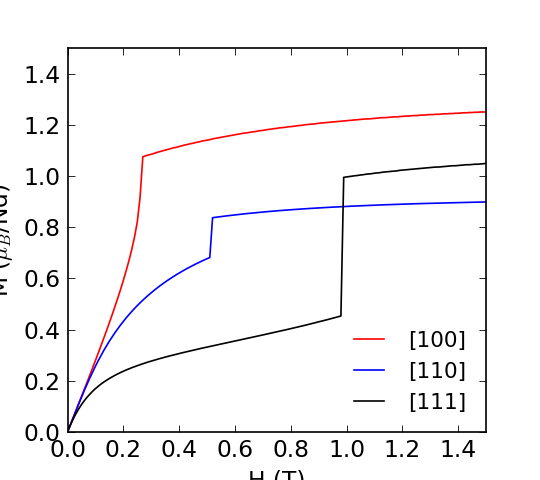

<IPython.core.display.Javascript object>


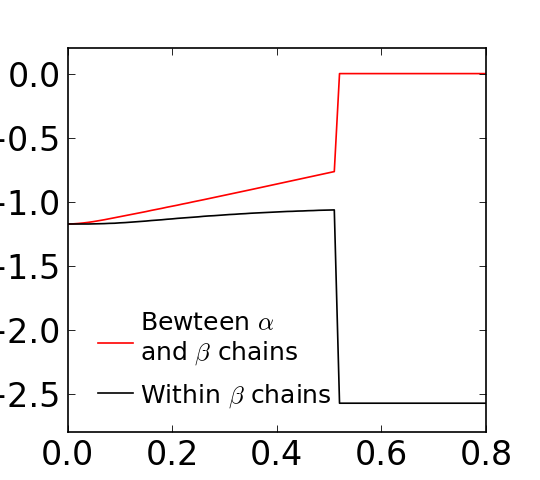

In [4]:
# 3D spins: Magnetisation and Bond energy in field (calculated by MMA)
# Magnetizations
fpath=r'D:\5_Neutron Scattering\6_E2_April_2015\field_along110/'
fname = [r'MH_H[100]_MMA.txt', r'MH_H[110]_MMA.txt', r'MH_H[111]_MMA.txt']
lab = ['[100]','[110]','[111]']
col = ['red','blue','black']
fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(4.5,4))
for idx, f in enumerate(fname):
    data = np.genfromtxt(os.path.join(fpath,fname[idx]),skip_header=2,usecols=[0,1])
    axs.plot(data[:,0],data[:,1],'-',lw=1,color=col[idx],label=lab[idx])

axs.set_xlabel('H (T)',size=14)
axs.set_ylabel(r'M ($\mu_{B}$/Nd)',fontsize=14)
axs.set_xlim([0,1.5])
axs.set_ylim([0,1.5])
plt.locator_params(axis = 'x', nbins = 12)
plt.xticks(color='k', size=14)
plt.yticks(color='k', size=14)
plt.legend(loc='best',frameon=False,labelspacing=0.5,fontsize=13)
#fig.savefig(os.path.join(fpath,'MH_MMA.pdf').replace('txt','pdf'), bbox_inches="tight",verbose=True)  
plt.show()

# Bond energy in field
fpath=r'D:\5_Neutron Scattering\6_E2_April_2015\field_along110/'
fname = r'MH_bondEnergy_H[110]_MMA.txt'
data = np.genfromtxt(os.path.join(fpath,fname),skip_header=2,usecols=[0,7,8,9])# exE in b chains and between a and b chains

# *100 for changing the unit
fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(4.5,4))
axs.plot(data[:,0],(data[:,2]+data[:,3])*100./2,'-',lw=1,color='red',label='Bewteen '+r'$\alpha$'+'\nand '+r'$\beta$'+' chains')# average to per spin
axs.plot(data[:,0],data[:,1]*100,'-',lw=1,color='black',label=r'Within $\beta$ chains')

#plt.xlabel('H (T)',size=18)
#axs.set_ylabel(r'Bond energy ($10^{-2}$meV)',fontsize=18)
axs.set_xlim([0,0.8])
axs.set_ylim([-2.8,0.2])
plt.locator_params(axis = 'x', nbins = 5)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.legend(loc='best',frameon=False,labelspacing=0.5,handletextpad=0,fontsize=15)
#fig.savefig(os.path.join(fpath,fname).replace('txt','pdf'), bbox_inches="tight",verbose=True)  
plt.show()

<IPython.core.display.Javascript object>


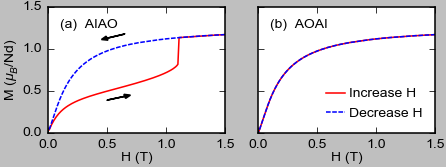

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [22]:
# 3D spins: Magnetisation and Bond energy in field (calculated by MMA)
# Magnetizations
fpath = r'D:\7_Writing\1_Paper Draft\5_Nd2Zr2O7_INS/'
fname = r'MH111_final_MMA.txt'
lab = ['Increase H','Decrease H']

data = np.genfromtxt(os.path.join(fpath,fname),skip_header=0,usecols=[0,1])
data = np.abs(data)

latexify()
fig, axs = plt.subplots(nrows=1, ncols=2, sharey=True,figsize=(4,1.5))

axs[0].plot(data[151:,0], data[151:,1], '-', lw=1, color='r', label=lab[0])
axs[0].plot(data[:150,0], data[:150,1], '--', lw=1, color='b', label=lab[1],dashes=[3,1])
axs[1].plot(data[:151,0], data[:151,1], '-', lw=1, color='r', label=lab[0])
axs[1].plot(data[:151,0], data[:151,1], '--', lw=1, color='b', label=lab[1],dashes=[3,1])

axs[0].arrow(0.5, 0.39, 0.15, 0.045, fc="k", ec="k",head_width=0.05, head_length=0.05)
axs[0].arrow(0.65, 1.18, -0.15, -0.05, fc="k", ec="k",head_width=0.05, head_length=0.05)

axs[0].text(0.1,1.25,'(a)  AIAO'); axs[1].text(0.1,1.25,'(b)  AOAI')
axs[0].set_xlabel('H (T)',labelpad=1)
axs[1].set_xlabel('H (T)',labelpad=1)
axs[0].set_ylabel(r'M ($\mu_{B}$/Nd)',labelpad=1)
axs[0].set_xlim([0,1.5])
axs[1].set_xlim([0,1.5])
axs[0].set_ylim([0,1.5])
axs[0].locator_params(axis = 'x', nbins = 3)
axs[1].locator_params(axis = 'x', nbins = 3)
axs[1].locator_params(axis = 'y', nbins = 5)

axs[1].legend(loc='best',frameon=False,labelspacing=0.5,handletextpad=0)
plt.tight_layout(pad=0.1,w_pad=1, h_pad=0)
fig.savefig(os.path.join(fpath,fname).replace('txt','pdf'))  
plt.show()

# Mont Carlo calculation for Nd2Zr2O7: Cp, MH and Nuetron  <a id='MC_cp_mh'></a>

In [188]:
# load data
path=r'D:\3_Physical Properties\Nd2Zr2O7\mk_MH_MT_in_Dresdern\SpinW_calculation_MH/'
fnames = ['nzo_MC_Owen_Cp(T).txt',
          'nzo_MC_our_param_Cp(T).txt']

cpt0 = np.genfromtxt(os.path.join(path,fnames[0]), dtype=None, skip_header=1)
cpt1 = np.genfromtxt(os.path.join(path,fnames[1]), dtype=None, skip_header=1)

# from scipy.interpolate import spline
# from scipy.interpolate import interp1d

# xnew = np.linspace(cpt0[:,0].min(), cpt0[:,0].max(),391) #300 represents number of points to make between T.min and T.max

# smooth = spline(cpt0[:,0],cpt0[:,1],xnew)
# cpt0 = np.column_stack([xnew,smooth])
# smooth = spline(cpt1[:,0],cpt1[:,1],xnew)
# cpt1 = np.column_stack([xnew,smooth])
# print cpt1

# f0 = interp1d(cpt0[:,0],cpt0[:,1], kind='cubic')
# f1 = interp1d(cpt1[:,0],cpt1[:,1], kind='cubic')

# cpt0 = np.column_stack([xnew,f0(xnew)])
# cpt1 = np.column_stack([xnew,f1(xnew)])

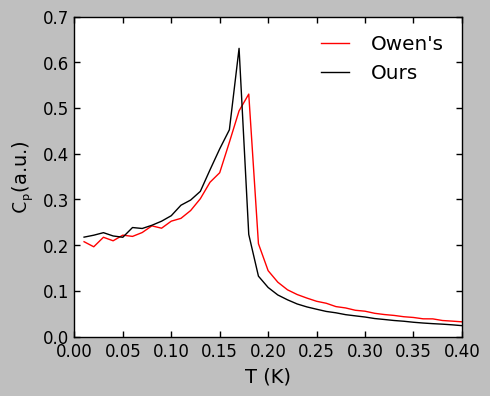

In [110]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))
# [111] direction
axs.set_color_cycle(['red','black','red', 'blue', 'purple'])
axs.plot(cpt0[:,0],cpt0[:,1],label="Owen's")
axs.plot(cpt1[:,0],cpt1[:,1],label="Ours")

# axs.text(0.9,0.5,'H//[111]',size=14, ha='left', va='center', 
#             backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))


axs.tick_params(axis='both',which='both',width=1,length=4,labelsize=12)

axs.set_xlabel('T (K)',size=14)
axs.set_ylabel('$\mathsf{C}_\mathsf{p}$(a.u.)',size=14)

axs.legend(loc='best',frameon=False)

fig.savefig(os.path.join(path,'nzo_MC_Cp_Owens_ours.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

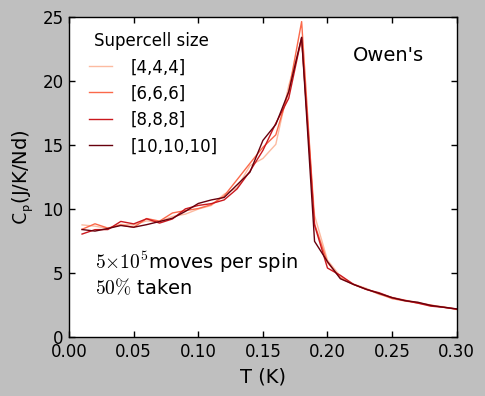

In [307]:
# Ｌｏａｄ　ｔｈｅ　Ｃｐ　ｄａｔａ　ｆｏｒ　ｃｈｅｃｋｉｎｇ　ｔｈｅ　ｓｉｚｅ　ｅｆｆｅｃｔ
path=r'D:\3_Physical Properties\Nd2Zr2O7\mk_MH_MT_in_Dresdern\SpinW_calculation_MH/'
fnames = ['nzo_MC_our_param_Cp(T)_CheckSize.txt']

cpChkSize = np.genfromtxt(os.path.join(path,fnames[0]), dtype=None, skip_header=8); 

fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))

# axs.set_color_cycle([plt.cm.cool(i) for i in arange(0,1,4) ])
colors = plt.cm.Reds(np.linspace(0.25,1,4,endpoint=True)) 
axs.set_color_cycle(colors)

axs.plot(cpChkSize[:,0],cpChkSize[:,1],
         cpChkSize[:,0],cpChkSize[:,2],
         cpChkSize[:,0],cpChkSize[:,3],
         cpChkSize[:,0],cpChkSize[:,4])

axs.text(0.22,22,"Owen's",size=14, ha='left', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
axs.text(0.02,5,"$\mathsf{5}$" r"$\times$" "$\mathsf{10^5}$" "moves per spin\n$50\%$ taken",size=14, ha='left', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))

axs.tick_params(axis='both',which='both',width=1,length=4,labelsize=12)

axs.set_xlabel('T (K)',size=14)
axs.set_ylabel('$\mathsf{C}_\mathsf{p}$(J/K/Nd)',size=14)

rline = mlines.Line2D([], [], color=colors[0], linestyle='-',  label='[4,4,4]')
bline = mlines.Line2D([], [], color=colors[1], linestyle='-',  label='[6,6,6]')
bkline = mlines.Line2D([], [], color=colors[2], linestyle='-', label='[8,8,8]')
ppline = mlines.Line2D([], [], color=colors[3], linestyle='-',label='[10,10,10]')

axs.legend(handles=[rline, bline, bkline,ppline],title='Supercell size',loc='best',fontsize=12,frameon=False)

#fig.savefig(os.path.join(path,'nzo_MC_Cp_Owens_checkSize.pdf'), bbox_inches="tight",verbose=True)  
plt.show()


In [309]:
# np.linspace(0.25,1,4,endpoint=True)
# plt.cm.jet(np.linspace(0.25,1,4,endpoint=True))


# n_lines = 5
# x = np.linspace(0, 10)
# phase_shift = np.linspace(0, np.pi, n_lines)

# color_idx = np.linspace(0, 1, n_lines)
# for i, shift in zip(color_idx, phase_shift):
#     plt.plot(x, np.sin(x - shift), color=plt.cm.jet(i), lw=3)

# plt.show()

# x = np.linspace(0, 2*np.pi, 64)
# y = np.cos(x) 

# plt.figure()
# plt.plot(x,y)

# n = 20
# colors = plt.cm.jet(np.linspace(0,1,n))

# for i in range(n):
#     plt.plot(x, i*y, color=colors[i])

In [238]:
# Ｌｏａｄ　ｔｈｅ　ＭＨ　ｄａｔａ
path=r'D:\3_Physical Properties\Nd2Zr2O7\mk_MH_MT_in_Dresdern\SpinW_calculation_MH/'
fnames = ['nzo_MC_Owen_param_MHs.txt',
          'nzo_MC_Owen_param_MHs_1.txt',
          'nzo_MC_our_param_MHs.txt',
          'nzo_MC_our_param_MHs_1.txt']
mh0  = np.genfromtxt(os.path.join(path,fnames[1]), dtype=None, skip_header=1); 
mh1  = np.genfromtxt(os.path.join(path,fnames[3]), dtype=None, skip_header=4); 
ts = np.linspace(0.01,0.25,num=5,endpoint=True)


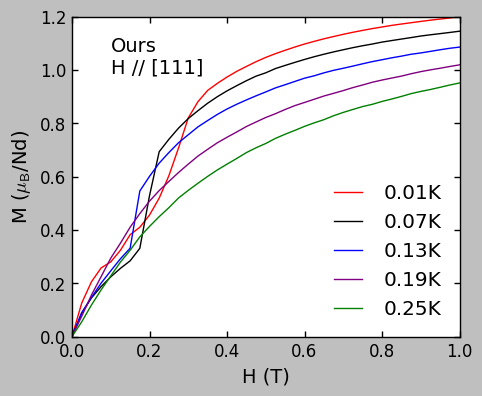

In [240]:
fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))
# [111] direction
axs.set_color_cycle(['red','black', 'blue','purple','green'])
#axs.set_color_cycle(['red','red','black','black', 'blue', 'blue','purple','purple','green'])
for i in xrange(0,5):
    #axs.plot(np.hstack([0,mh0[i*40:(i+1)*40,1]]), np.hstack([0, mh0[i*40:(i+1)*40,2]]),label='{:1.2f}K'.format(ts[i]))
    axs.plot(np.hstack([0,mh1[i*40:(i+1)*40,1]]), np.hstack([0, mh1[i*40:(i+1)*40,2]]),label='{:1.2f}K'.format(ts[i]))
    #axs.plot(mh0[i*40:(i+1)*40,1], mh0[i*40:(i+1)*40,2],color='red', label='{:1.2f}K'.format(ts[i]))
    #axs.plot(mh1[i*40:(i+1)*40,1], mh1[i*40:(i+1)*40,2],'--',color='black')

axs.text(0.1,1.05,"Ours\nH // [111]",size=14, ha='left', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))
    
axs.tick_params(axis='both',which='both',width=1,length=4,labelsize=12)

axs.set_xlabel('H (T)',size=14)
axs.set_ylabel('M ($\mathsf{\mu_B}$/Nd)',size=14)

axs.legend(loc='best',frameon=False)

fig.savefig(os.path.join(path,'nzo_MC_MH_Ours.pdf'), bbox_inches="tight",verbose=True)  
plt.show()

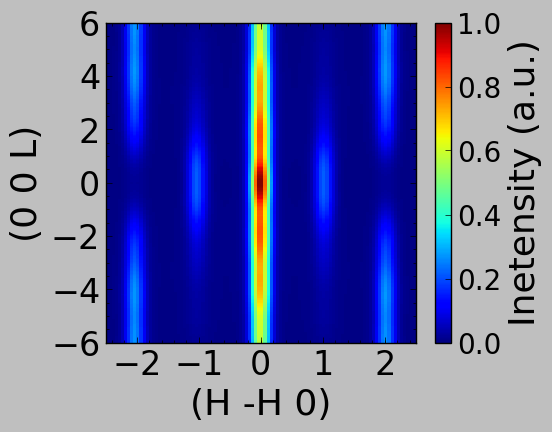

In [4]:
# MC neutron scattering of chains in [110] field
fpath=r'D:\5_Neutron Scattering\6_E2_April_2015\field_along110/'
fname = [r'nzo_MC_OwensP_50mk_0p5T(110)_neutron[h-hl]_Chain_a.txt', 
         r'nzo_MC_OwensP_50mk_0p5T(110)_neutron[h-hl]_Chain_b.txt']

idx =1
sigma = [[2,4],[2,10]]
lab = ['(a)','(b)']
x = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=4, max_rows=1)
y = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=5, max_rows=1)
I = np.genfromtxt(os.path.join(fpath,fname[idx]),delimiter=',',skip_header=6)

#print x.shape, y.shape, I[50,130] # the center at (0,0) is nan
I[np.isnan(I)] = np.nanmax(I)
from scipy import ndimage
I = ndimage.gaussian_filter(I, sigma[idx], order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)

# calculated formfactor of Nd
X, Y = np.meshgrid(x,y)
latt = 10.61 # in \AA
ff_nd = ff_HHL_plane(X,Y, latt)

fig, axs = plt.subplots(nrows=1, ncols=1, sharey='row',figsize=(5,4))

#pcol = axs.pcolormesh(x, y, ff_nd, vmin=0,vmax=1, cmap='jet',linewidth=0,rasterized=True)
pcol = axs.pcolormesh(x, y, ff_nd*I.T/np.nanmax(I),vmin=0,vmax=1, cmap='jet',linewidth=0,rasterized=True)
pcol.set_edgecolor('face') # remove the white lines in the plot

plt.axis([-2.5,2.5,-6,6])
plt.xlabel('(H -H 0)',size=26)
plt.ylabel('(0 0 L)',size=26)

plt.minorticks_on()
#plt.tick_params(labelsize=26)
plt.xticks(color='k', size=24)
plt.yticks(color='k', size=24)

cb = plt.colorbar(pcol,ticks=np.linspace(0,1,num=6,endpoint=True)) # label='Intensity', ticks=range(0,100)
cb.ax.set_ylabel('Inetensity (a.u.)',fontsize=26)
cb.ax.tick_params(labelsize=20)

fig.savefig(os.path.join(fpath,fname[idx]).replace('txt','pdf'), bbox_inches="tight",verbose=True)  
plt.show()

# Plot MH_14T data with MC MH <a id='data_MC_mh'></a>

In [127]:
import pandas as pd
fpath = r'D:\3_Physical Properties\Nd2Zr2O7\mh_mean_field'
sheetnames = ['100_3T', '110', '111_3T']
df = pd.read_excel(os.path.join(fpath,'mh_data_14T.xlsx'),sheetname=sheetnames, header=0)

#xls = pd.ExcelFile(os.path.join(fpath,'mh_data_14T.xlsx'))
#xls.sheet_names

print df['100_3T']['H(Oe)']

0           0.212
1         106.293
2         512.129
3        1014.227
4        1548.690
5        2045.154
6        2529.797
7        3014.436
8        3576.754
9        4049.851
10       4534.204
11       5065.278
12       5516.700
13       6043.547
14       6542.534
15       7036.171
16       7504.757
17       8056.649
18       8504.128
19       9071.503
20       9556.693
21      10020.493
22      10558.314
23      11042.938
24      11548.391
25      12057.221
26      12517.926
27      13029.007
28      13516.444
29      14022.463
          ...    
252    125535.938
253    126027.883
254    126526.570
255    127017.945
256    127504.258
257    128065.148
258    128510.367
259    129056.344
260    129568.820
261    130000.539
262    130545.945
263    131003.828
264    131563.031
265    132054.969
266    132551.969
267    133011.266
268    133500.953
269    134001.063
270    134547.594
271    135036.438
272    135522.188
273    136005.391
274    136536.172
275    137023.609
276    137

In [129]:
print df.keys()
print df['100_3T'].keys()
#df['H(Oe)']
list(df)
print df['100_3T'].columns
print df['100_3T'].head()

['100_3T', '111_3T', '110']
Index([u'H(Oe)', u'M (mub/Nd 1.8K)', u'H(Oe).1', u'M (mub/Nd 5K)', u'H(Oe).2',
       u'M (mub/Nd 10K)'],
      dtype='object')
Index([u'H(Oe)', u'M (mub/Nd 1.8K)', u'H(Oe).1', u'M (mub/Nd 5K)', u'H(Oe).2',
       u'M (mub/Nd 10K)'],
      dtype='object')
      H(Oe)  M (mub/Nd 1.8K)   H(Oe).1  M (mub/Nd 5K)     H(Oe).2  \
0     0.212        -0.011126     0.321      -0.003713  139999.813   
1   106.293        -0.006729   105.716      -0.001836  139918.500   
2   512.129         0.032433   536.880       0.012203  139449.922   
3  1014.227         0.078021  1014.495       0.026853  138939.109   
4  1548.690         0.127564  1567.817       0.044481  138468.000   

   M (mub/Nd 10K)  
0        1.303577  
1        1.303966  
2        1.302031  
3        1.300649  
4        1.298359  


<IPython.core.display.Javascript object>


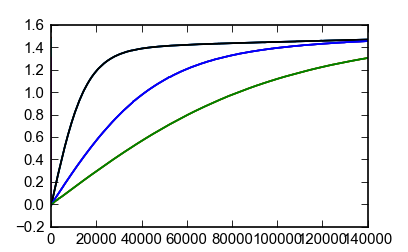

In [137]:
sheet = df['100_3T']
plt.plot(sheet['H(Oe)'], sheet['M (mub/Nd 1.8K)'])
plt.plot(sheet['H(Oe).1'], sheet['M (mub/Nd 5K)'])
plt.plot(sheet['H(Oe).2'], sheet['M (mub/Nd 10K)'])

plt.show()

In [144]:
# data files with only 30mk data
import fnmatch
fname='nzo_cal_mh_*.txt'

fnames=[] #index for different files
for file in os.listdir(fpath):
    if fnmatch.fnmatch(file, fname):      
        print(file)
        fnames.append(file)
        
# load data
fnames = ['nzo_cal_mh__1.80K_new_pars.txt','nzo_cal_mh__5.00K_new_pars.txt',
          'nzo_cal_mh__10.00K_new_pars.txt','nzo_cal_mh__20.00K_new_pars.txt']

Mt1 = np.genfromtxt(os.path.join(fpath,fnames[0]), dtype=None, skip_header=1)
Mt2 = np.genfromtxt(os.path.join(fpath,fnames[1]), dtype=None, skip_header=1)
Mt3 = np.genfromtxt(os.path.join(fpath,fnames[2]), dtype=None, skip_header=1)
Mt4 = np.genfromtxt(os.path.join(fpath,fnames[3]), dtype=None, skip_header=1)
M_allT = [Mt1,Mt2,Mt3,Mt4]

nzo_cal_mh__1.80K_new_pars.txt
nzo_cal_mh__10.00K_new_pars.txt
nzo_cal_mh__20.00K_new_pars.txt
nzo_cal_mh__5.00K_new_pars.txt


In [155]:
print M_allT

[array([[1.0000000e-02, 7.3740000e-03, 7.3740000e-03, 7.3730000e-03,
        7.3730000e-03, 7.3730000e-03, 7.3730000e-03],
       [1.1064700e-01, 8.1508000e-02, 8.1508000e-02, 8.1428000e-02,
        8.1428000e-02, 8.1403000e-02, 8.1403000e-02],
       [2.1129500e-01, 1.5524900e-01, 1.5524900e-01, 1.5470200e-01,
        1.5470200e-01, 1.5455100e-01, 1.5455100e-01],
       [3.1194200e-01, 2.2824800e-01, 2.2824800e-01, 2.2651500e-01,
        2.2651500e-01, 2.2613400e-01, 2.2613400e-01],
       [4.1259000e-01, 3.0017000e-01, 3.0017000e-01, 2.9623900e-01,
        2.9623900e-01, 2.9562800e-01, 2.9562800e-01],
       [5.1323700e-01, 3.7069800e-01, 3.7069800e-01, 3.6332300e-01,
        3.6332300e-01, 3.6265100e-01, 3.6265100e-01],
       [6.1388500e-01, 4.3954200e-01, 4.3954200e-01, 4.2730300e-01,
        4.2730300e-01, 4.2692000e-01, 4.2692000e-01],
       [7.1453200e-01, 5.0644100e-01, 5.0644100e-01, 4.8781100e-01,
        4.8781100e-01, 4.8821800e-01, 4.8821800e-01],
       [8.1518000e-01, 

<IPython.core.display.Javascript object>


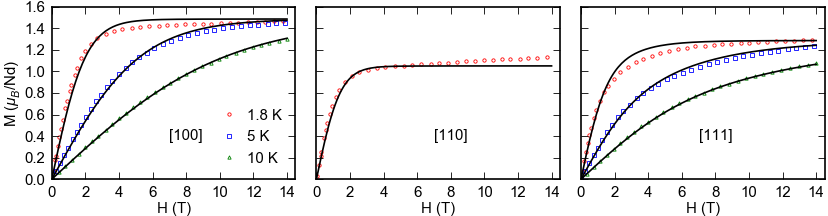

In [213]:
labs = ['[100]','[110]','[111]']
fig, axs =plt.subplots(ncols=3,nrows=1,sharey=True,figsize=[6.9,1.8])
for idx, ax in enumerate(axs):
    sheet = df[sheetnames[idx]]
    if idx==0 or idx==2:
        ax.plot(sheet['H(Oe)']/10000,   sheet['M (mub/Nd 1.8K)'],'o',ms=2,mec='r',mfc='None',markevery=0.03,label='1.8 K')
        ax.plot(sheet['H(Oe).1']/10000, sheet['M (mub/Nd 5K)'],  's',ms=2,mec='b',mfc='None',markevery=0.03,label='5 K')
        ax.plot(sheet['H(Oe).2']/10000, sheet['M (mub/Nd 10K)'], '^',ms=2,mec='g',mfc='None',markevery=0.03,label='10 K')
        for m in M_allT:
            ax.plot(m[:,0], m[:,idx*2+1],'black')
    elif idx==1:
        ax.plot(sheet['H(Oe)']/10000, sheet['M (mub/Nd 1.8K)'],  'o',ms=2,mec='r',mfc='None',markevery=0.03)
        for m in M_allT[0:1]:
            ax.plot(m[:,0], m[:,idx*2+1],'black')
            
    ax.text(8,0.4,labs[idx], ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))        
    ax.set_xlim([0,14.5])
    ax.set_xlabel('H (T)',labelpad=1)
    
axs[0].legend(loc='best',numpoints=1,handletextpad=0.2,frameon=False)    
axs[0].set_ylabel(r'M ($\mu_{B}$/Nd)',labelpad=1)
axs[0].set_ylim([0,1.6])

plt.tight_layout(pad=0.1,w_pad=1, h_pad=0)
plt.show()

<IPython.core.display.Javascript object>


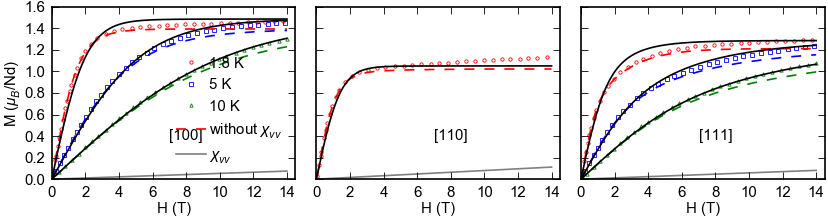

[5.35069225e-07 1.39383780e+00]
[5.83306906e-07 1.21127285e+00]


In [230]:
from scipy.optimize import curve_fit
def fitReg(dat, *args):
    if len(args)==1:# when the low and high limits is in a list
        mask = (args[0][0]< dat[:,0]) & (dat[:,0] < args[0][1])
    else: # two augs give the the two limits
        mask = (args[0]< dat[:,0]) & (dat[:,0] < args[1])
    return dat[mask,:]

labs = ['[100]','[110]','[111]']
fig, axs =plt.subplots(ncols=3,nrows=1,sharey=True,figsize=[6.9,1.8])
for idx, ax in enumerate(axs):
    sheet = df[sheetnames[idx]]
    if idx==0 or idx==2:
        # Plot original data
        ax.plot(sheet['H(Oe)']/10000,   sheet['M (mub/Nd 1.8K)'],'o',ms=2,mec='r',mfc='None',markevery=0.03,label='1.8 K')
        ax.plot(sheet['H(Oe).1']/10000, sheet['M (mub/Nd 5K)'],  's',ms=2,mec='b',mfc='None',markevery=0.03,label='5 K')
        ax.plot(sheet['H(Oe).2']/10000, sheet['M (mub/Nd 10K)'], '^',ms=2,mec='g',mfc='None',markevery=0.03,label='10 K')
        
        # Fit and subtract chi vv
        xy = fitReg(sheet.iloc[:,0:2].values,[12*10000,14*10000])
        popt, pcov = curve_fit(lambda x, a, b: a*x+b, xy[:,0], xy[:,1], p0=[0.001,1.4])
        print popt
        
        ax.plot(sheet['H(Oe)']/10000,   sheet['M (mub/Nd 1.8K)'] - popt[0]*sheet['H(Oe)'],'--',color='r',label=r'without $\chi_{vv}$')
        ax.plot(sheet['H(Oe).1']/10000, sheet['M (mub/Nd 5K)'] - popt[0]*sheet['H(Oe).1'],  '--',color='b')
        ax.plot(sheet['H(Oe).2']/10000, sheet['M (mub/Nd 10K)'] - popt[0]*sheet['H(Oe).2'], '--',color='g')
        ax.plot(sheet['H(Oe)']/10000,  popt[0]*sheet['H(Oe)'], c='gray',label=r'$\chi_{vv}$')
        for m in M_allT:
            ax.plot(m[:,0], m[:,idx*2+1],'black')
    elif idx==1:
        ax.plot(sheet['H(Oe)']/10000, sheet['M (mub/Nd 1.8K)'],  'o',ms=2,mec='r',mfc='None',markevery=0.03)
        
        xy = fitReg(sheet.iloc[:,0:2].values,[12*10000,14*10000])
        popt, pcov = curve_fit(lambda x, a, b: a*x+b, xy[:,0], xy[:,1], p0=[0.001,1.4])
        ax.plot(sheet['H(Oe)']/10000, sheet['M (mub/Nd 1.8K)'] - popt[0]*sheet['H(Oe)'],'--',color='r')
        ax.plot(sheet['H(Oe)']/10000, popt[0]*sheet['H(Oe)'],c='gray', label=r'$\chi_{vv}$')
        for m in M_allT[0:1]:
            ax.plot(m[:,0], m[:,idx*2+1],'black')
            
    ax.text(8,0.4,labs[idx], ha='center', va='center', 
            backgroundcolor='white',bbox=dict(facecolor='none', edgecolor='white', boxstyle='round'))        
    ax.set_xlim([0,14.5])
    ax.set_xlabel('H (T)',labelpad=1)
    
axs[0].legend(loc='best',numpoints=1,handletextpad=0.2,frameon=False)    
axs[0].set_ylabel(r'M ($\mu_{B}$/Nd)',labelpad=1)
axs[0].set_ylim([0,1.6])

plt.tight_layout(pad=0.1,w_pad=1, h_pad=0)
plt.show()

In [231]:
2.4959e3/**2*3

18688550.43